In [2]:
import pandas as pd
from openpyxl import load_workbook
from IPython.display import Image
from sklearn.preprocessing import Imputer
from sklearn import tree
from subprocess import check_call
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
#mengimport library yg digunakan untuk load data excel dan library lainnya yg digunakan untuk proses clustering

In [3]:
wb = pd.read_excel('datafix.xlsx', 'Sheet1')

df =wb
df.sample(10)
#load data excel yg akan digunakan untuk diclustering

,SNo,BookingDate,BookingMonth,ID,STTNo,Shipper,OriginCity,DestinationCity,ForwardArea,Product,GrossWt,VolumeWt,CommodityName,LastTrackingStatus
1270,110848653,2018-04-24,4,JOG-1932,11-18-653402,PANTI RACER YOGYAKARTA,JOG31,51,NaN,ONEPACK,1,1,CLOTHING/GARMENT,RECEIPT BY MUDJIR .
1679,110965588,2018-05-09,5,JOG-1932,10-17-1618724,CLEVHOSHOP JOGJA,JOG31,73,NaN,REGPACK,38,23,CLOTHING/GARMENT,RECEIPT BY NIKEN .
4215,112009959,2018-08-27,8,JOG-1932,11-18-1532293,NIKO RERESSY,JOG31,81,NaN,REGPACK,1,1,DOCUMENT,RECEIPT BY F RERESSY .
4221,112018378,2018-08-28,8,JOG-1932,11-18-1538609,STEFIANA N TASMIN,JOG31,64,NaN,REGPACK,41,39,CLOTHING/GARMENT,RECEIPT BY EMANUEL .
3407,111611098,2018-07-24,7,JOG-1932,11-18-1230271,wacana bokoe,JOG31,81,NaN,REGPACK,1,1,BOOK / BUKU,RECEIPT BY ADEL
1301,110856122,2018-04-25,4,JOG-1932,10-17-1617890,PANTI RACER YOGYAKARTA,JOG31,72,NaN,REGPACK,11,9,CLOTHING/GARMENT,RECEIPT BY ANGGI .
3201,111499873,2018-07-14,7,JOG-1932,11-18-1142233,AANG,JOG31,53,NaN,REGPACK,1,1,DOCUMENT,RECEIPT BY NATALIA ANDHISTY .
3425,111620399,2018-07-25,7,JOG-1932,10-17-1618643,3NIEL YANES MIRLAUW,JOG31,81,NaN,ONEPACK,6,7,ACCESSORIES,RECEIPT BY CALO .
3512,111659656,2018-07-28,7,JOG-1932,11-18-1269128,EZE 19 SHOP,JOG31,91,NaN,REGPACK,1,1,CLOTHING/GARMENT,RECEIPT BY RESKY 3SELLIN .
3202,111500191,2018-07-14,7,JOG-1932,11-18-1142505,DNAZWA_BEDDING_CRAFTING,JOG31,74,NaN,REGPACK,3,3,GLASSWARE,RECEIPT BY TARMAN .


In [4]:


d = df[['SNo', 'Product', 'GrossWt', 'VolumeWt']]
d = d.dropna(axis=0, how='any')
d.columns = ['SNo', 'Product', 'Gross', 'Volume']
d
#menentukan baris dan kolom yg digunakan dalam proses clustering

,SNo,Product,Gross,Volume
0,110459075,REGPACK,7,3
1,110459088,REGPACK,1,1
2,110459140,REGPACK,2,1
3,110459171,ONEPACK,1,1
4,110459198,REGPACK,1,1
...,...,...,...,...
4319,112061999,REGPACK,5,4
4320,112062448,REGPACK,1,1
4321,112062913,REGPACK,1,1
4322,112064013,REGPACK,1,1


In [5]:
d.loc[d['Product'] == 'REGPACK', 'Product'] = 1
d.loc[d['Product'] == 'ONEPACK', 'Product'] = 2  
d.sample(10)

,SNo,Product,Gross,Volume
2872,111349987,1,8,7
695,110681745,1,10,8
2421,111185529,1,3,4
2065,111070006,2,1,1
3210,111509968,1,2,1
3763,111781416,1,1,1
2214,111120703,1,2,2
2952,111394723,1,1,1
2675,111261903,1,10,4
1061,110786410,1,1,1


## Something something

In [6]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


datasample = d.sample(400)

In [7]:
proda = datasample.loc[datasample.Product == 1]
prodb = datasample.loc[datasample.Product == 2]

In [8]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


# Generate test data
np.random.seed(23)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1) 
labels = np.zeros(1)

for i, x in proda.iterrows():
    xapts = np.hstack((xpts, np.random.standard_normal(100) * x['Volume'] ))
    yapts = np.hstack((ypts, np.random.standard_normal(100) * x["Gross"]))
    
xpts = np.zeros(1)
ypts = np.zeros(1) 
for i, x in prodb.iterrows():
    xbpts = np.hstack((xpts, np.random.standard_normal(100) * x['Volume'] ))
    ybpts = np.hstack((ypts, np.random.standard_normal(100) * x["Gross"]))
    
# Visualize the test data 
alldata_a = np.vstack((xapts, yapts))
alldata_b = np.vstack((xbpts, ybpts))

ncluster = 2

cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata_a, 5, 2, error=0.005, maxiter=1000)

cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata_b, ncluster, 2, error=0.005, maxiter=1000)

u_orig

array([[2.71415220e-01, 4.96074208e-03, 1.77803843e-02, 9.09905672e-02,
        6.50863949e-01, 5.67986953e-01, 5.69274269e-01, 7.43687515e-02,
        4.65554030e-01, 8.56409762e-01, 9.23709515e-01, 9.99186206e-01,
        9.46937406e-01, 9.43238517e-01, 1.51762070e-02, 2.83083759e-02,
        9.34364498e-02, 4.64242053e-01, 8.17513479e-01, 1.88104872e-01,
        1.44456630e-01, 8.65949590e-01, 9.08572463e-01, 3.31243498e-01,
        1.08619957e-01, 1.30107500e-01, 1.49315832e-02, 8.79344798e-01,
        5.01143034e-02, 8.87704774e-01, 6.57521753e-02, 8.43976332e-01,
        8.34548526e-01, 1.47997276e-01, 9.32808259e-01, 7.26977400e-02,
        8.71417169e-01, 1.03484761e-01, 9.32723284e-01, 9.60987305e-01,
        8.99230888e-02, 2.69853810e-01, 8.81610988e-01, 7.46516735e-01,
        8.18648001e-01, 2.20032506e-01, 5.14331168e-01, 1.78171304e-01,
        4.28423502e-01, 9.19523969e-01, 1.23425003e-01, 6.84368728e-02,
        6.93706894e-01, 8.37779617e-01, 9.33348142e-02, 4.383641

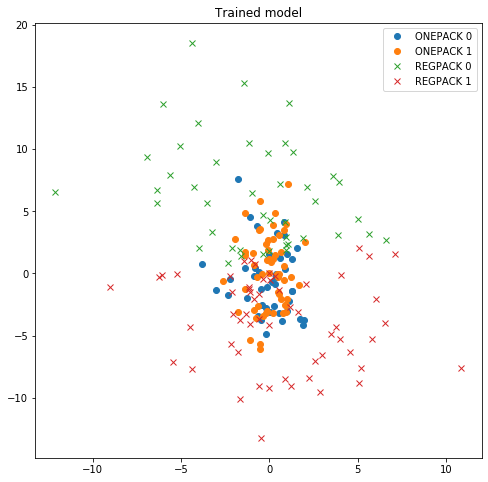

In [9]:

# Show 3-cluster model
fig2, ax2 = plt.subplots(figsize =[8,8])
ax2.set_title('Trained model')
for j in range(ncluster):
    ax2.plot(alldata_a[0, u_orig.argmax(axis=0) == j],
             alldata_a[1, u_orig.argmax(axis=0) == j], 'o',
             label='ONEPACK ' + str(j))
    
for j in range(ncluster):
    ax2.plot(alldata_b[0, u_orig.argmax(axis=0) == j],
             alldata_b[1, u_orig.argmax(axis=0) == j], 'x',
             label='REGPACK ' + str(j))
    
ax2.legend()

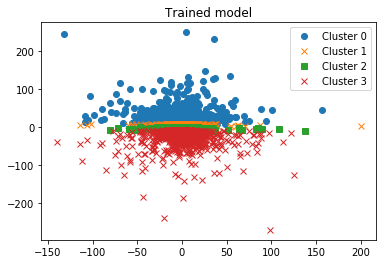

In [10]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)

for i, x in datasample.iterrows():
    xpts = np.hstack((xpts, np.random.standard_normal(100) * x['Volume'] ))
    ypts = np.hstack((ypts, np.random.standard_normal(100) * x["Gross"]))
    
# Visualize the test data 
alldata = np.vstack((xpts, ypts))

n_cluster = 4
cntr, u_orig, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data=alldata, c=n_cluster,
                                                 m=2, error=0.005, maxiter=100)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
symbols = ['o','x','s', 'x', 'x', 'd']
for j in range(n_cluster):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], symbols[j],
             label='Cluster ' + str(j))
ax2.legend()

In [15]:
jm

array([1641052.93302612, 1243837.42375881, 1243670.75629153,
       1243044.64696979, 1241295.28240104, 1238335.59648798,
       1235381.6343534 , 1233287.09942615, 1231865.93830247,
       1230595.50727412, 1228947.58624837, 1226388.08566384,
       1222451.23418704, 1217071.3170118 , 1210772.41329486,
       1204293.89481681, 1198195.5219351 , 1192801.54749391,
       1188252.55551458, 1184554.38072705, 1181626.06351916,
       1179347.88212796, 1177596.76339729, 1176263.07800127,
       1175255.16996989, 1174498.71700761, 1173934.52656025,
       1173516.08929706, 1173207.29212659, 1172980.39725657,
       1172814.30936452, 1172693.12573249, 1172604.95023743,
       1172540.94295206, 1172494.5722281 , 1172461.03518705,
       1172436.81452695, 1172419.34325301, 1172406.75333515,
       1172397.68869088, 1172391.16689345, 1172386.47743646,
       1172383.1072118 , 1172380.68611584, 1172378.9474653 ,
       1172377.69926188, 1172376.80337559, 1172376.16049068,
       1172375.6992348 ,

In [12]:
u_orig

array([[0.0028856 , 0.00101893, 0.00207343, ..., 0.00251944, 0.00496424,
        0.00803656],
       [0.5424913 , 0.04266498, 0.21441108, ..., 0.09912471, 0.52063262,
        0.1579529 ],
       [0.45203756, 0.95500587, 0.78144627, ..., 0.89512657, 0.46994701,
        0.81850655],
       [0.00258554, 0.00131022, 0.00206922, ..., 0.00322928, 0.00445613,
        0.015504  ]])